# Task 1

In [8]:
import cv2
import numpy as np

# Create four 50x50 images with distinct colors using OpenCV
image1 = np.full((50, 50, 3), [0, 0, 255], dtype=np.uint8)    # Red (BGR format)
image2 = np.full((50, 50, 3), [0, 255, 0], dtype=np.uint8)    # Green
image3 = np.full((50, 50, 3), [255, 0, 0], dtype=np.uint8)    # Blue
image4 = np.full((50, 50, 3), [0, 255, 255], dtype=np.uint8)  # Yellow

# Display the four 50x50 images
cv2.imshow('Red Image', image1)
cv2.imshow('Green Image', image2)
cv2.imshow('Blue Image', image3)
cv2.imshow('Yellow Image', image4)

cv2.waitKey(0)  # Wait for a key press before closing the windows
cv2.destroyAllWindows()

# Combine the four images into a 100x100 image
top_row = np.hstack((image1, image2))  # Combine the top row
bottom_row = np.hstack((image3, image4))  # Combine the bottom row
combined_image = np.vstack((top_row, bottom_row))  # Combine both rows

# Display the 100x100 combined image
cv2.imshow('Combined 100x100 Image', combined_image)

cv2.waitKey(0)  # Wait for a key press before closing the window
cv2.destroyAllWindows()

# Resize the combined image to 200x200
resized_image = cv2.resize(combined_image, (200, 200))

# Display the 200x200 resized image
cv2.imshow('Resized 200x200 Image', resized_image)

cv2.waitKey(0)  # Wait for a key press before closing the window
cv2.destroyAllWindows()

# Task 2

In [2]:
import cv2
import numpy as np

def convert_to_grayscale(frame):
    """Convert the frame to grayscale."""
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

def convert_to_hsv(frame):
    """Convert the frame to HSV."""
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

def rotate_frame(frame):
    """Rotate the frame by 90 degrees clockwise."""
    return cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

def main():
    # Initialize the video capture object
    cap = cv2.VideoCapture(0)

    # Set up video writer for saving video stream
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = None
    recording = False  # This is the recording flag
    process_mode = 'original'  # Default processing mode

    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Failed to capture frame")
            break

        # Process the frame based on the selected mode
        if process_mode == 'grayscale':
            display_frame = convert_to_grayscale(frame)
        elif process_mode == 'hsv':
            display_frame = convert_to_hsv(frame)
        elif process_mode == 'rotated':
            display_frame = rotate_frame(frame)
        else:
            display_frame = frame.copy()

        key = cv2.waitKey(1) & 0xFF
        
        # Change processing mode based on key press
        if key == ord('g'):  # If 'g' is pressed
            process_mode = 'grayscale'
            print("Switched to Grayscale mode")
        elif key == ord('h'):  # If 'h' is pressed
            process_mode = 'hsv'
            print("Switched to HSV mode")
        elif key == ord('r'):  # Rotate frame by 90 degrees
            process_mode = 'rotated'
            print("Switched to Rotated mode")
        elif key == ord('o'):  # Switch back to original mode
            process_mode = 'original'
            print("Switched to Original mode")
        elif key == ord('c'):  # Save the current frame
            cv2.imwrite('saved_frame.jpg', frame)
            print("Frame saved as 'saved_frame.jpg'")
        elif key == ord('s'):  # Start or stop video recording
            if not recording:
                # Start recording
                out = cv2.VideoWriter('output.avi', fourcc, 20.0, (frame.shape[1], frame.shape[0]))
                recording = True
                print("Recording started")
            else:
                # Stop recording
                recording = False
                out.release()
                print("Recording stopped")

        # Save video stream if recording
        if recording and out is not None:
            # Write the original frame to the video file
            out.write(frame)

        # Display the processed frame
        cv2.imshow("Camera Frame", display_frame)

        # Press 'Q' to quit the program
        if key == ord('q'):
            break

    # Release resources
    cap.release()
    if out is not None:
        out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Switched to Rotated mode
Switched to Rotated mode
Switched to Original mode
Switched to Grayscale mode
Switched to HSV mode
Switched to Original mode


# Task 3

In [3]:
import numpy as np
import cv2

# Initialize the pool dimensions and starting position of the float
pool_width = 600
pool_height = 400
x_pos = pool_width // 2  # Start in the center of the pool
y_pos = 0  # Start at the bottom (y-axis), represents the start point

# Get inputs for the float's movement
velocity = float(input("Enter float's velocity (in meters per second): "))
time = float(input("Enter time interval (in seconds): "))
x_shift = float(input("Enter the x-axis drift (in meters, positive for right, negative for left): "))

# Time progression and calculation for the y-axis (vertical)
y_change = velocity * time
y_pos += int(y_change)

# Calculate x-axis movement
x_pos += int(x_shift * 100)  # Scaling factor for visual representation

# Ensure the float stays within the pool boundaries
x_pos = np.clip(x_pos, 0, pool_width)
y_pos = np.clip(y_pos, 0, pool_height)

# Create a blank pool map
pool = np.ones((pool_height, pool_width, 3), dtype=np.uint8) * 255  # White background for the pool

# Draw the pool boundaries
cv2.rectangle(pool, (0, 0), (pool_width, pool_height), (0, 0, 255), 2)

# Draw the starting point (bottom of the pool)
cv2.circle(pool, (pool_width // 2, 0), 10, (0, 255, 0), -1)  # Green circle representing the start point
cv2.putText(pool, "Start Point", (pool_width // 2 - 50, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Draw the float's current position (surface point)
cv2.circle(pool, (x_pos, y_pos), 10, (255, 0, 0), -1)  # Blue circle representing the float
cv2.putText(pool, "Surface Point", (x_pos - 50, y_pos + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display information
cv2.putText(pool, f"Float Position: ({x_pos}, {y_pos})", (10, pool_height - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Show the pool map with the float and start point
cv2.imshow("Pool Float Simulation", pool)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Task 4

In [27]:
import cv2
import numpy as np

# Initialize a list to store circle coordinates
circles = []

# Callback function to draw circles
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        circles.append((x, y))

# Create a black canvas
canvas = np.zeros((500, 500, 3), dtype='uint8')

# Create a window
cv2.namedWindow('Canvas')
cv2.setMouseCallback('Canvas', draw_circle)

while True:
    temp_canvas = canvas.copy()

    # Draw all circles from the list
    for center in circles:
        cv2.circle(temp_canvas, center, 20, (67, 55, 128), -1)
    
    # Display the canvas
    cv2.imshow('Canvas', temp_canvas)

    key = cv2.waitKey(1) & 0xFF

    # Press 'z' to delete the last circle
    if key == ord('z') and circles:
        circles.pop()

    # Press 'x' to delete all circles
    if key == ord('x'):
        circles = []

    # Press 'q' to quit
    if key == ord('q'):
        break

cv2.destroyAllWindows()


# Task 5

In [4]:
import cv2
import numpy as np

#important 
#must start pointing from left to make image not flipped

# Create a list to store the points
points = []

# Callback function for mouse events
def select_points(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDOWN:
        # Append the selected point to the list
        points.append((x, y))
        # Draw a small circle where the point is selected
        cv2.circle(image_copy, (x, y), 5, (230, 15, 60), -1)
        cv2.imshow("Select Points", image_copy)

        # When four points are selected, perform the transformation
        if len(points) == 4:
            # Perform perspective transformation
            bird_eye_view()

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to perform perspective transformation
# dynamically calculated dimensions, resulting in an adaptive bird’s eye view.
def bird_eye_view():
    global points

    # Calculate the width of the card
    width_top = euclidean_distance(points[0], points[1])
    width_bottom = euclidean_distance(points[2], points[3])
    width = max(int(width_top), int(width_bottom))

    # Calculate the height of the card
    height_left = euclidean_distance(points[0], points[3])
    height_right = euclidean_distance(points[1], points[2])
    height = max(int(height_left), int(height_right))

    # Points in the output (bird's eye) image
    dst_points = np.array([
        [0, 0],
        [width, 0],
        [width, height],
        [0, height]
    ], dtype="float32")

    # Convert points to NumPy array
    src_points = np.array(points, dtype="float32")

    # Get the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # Apply the perspective transformation
    warped_image = cv2.warpPerspective(image, matrix, (width, height))

    # Show the resulting bird's eye view image
    cv2.imshow("Bird's Eye View", warped_image)

# Load the image
image = cv2.imread(r"D:\Vortex\ROV\Phase 1\CV_tasks\task_5\jhonsmith.jpg")

# Make a copy of the image for drawing points
image_copy = image.copy()

# Set up the OpenCV window and set the mouse callback
cv2.imshow("Select Points", image_copy)
cv2.setMouseCallback("Select Points", select_points)

# Wait until a key is pressed, then exit
cv2.waitKey(0)
cv2.destroyAllWindows()



: 

# Task 6

In [1]:
import cv2
import os
import numpy as np

# Paths
original_image_path = "D:/Vortex/ROV/Phase 1/CV_tasks/task_6/original.png"
seagrass_folder = "D:/Vortex/ROV/Phase 1/CV_tasks/task_6/seagrass_images/"

# Load the original image
original_image = cv2.imread(original_image_path)

# Define grid size our image is (8 rows and 8 columns)
grid_size = (8, 8)  # Example grid size

# Function to split image into grids
def split_image_into_grids(image, grid_size):
    h, w = image.shape[:2]
    grid_h, grid_w = h // grid_size[0], w // grid_size[1]
    
    grids = []
    for i in range(0, h, grid_h):
        for j in range(0, w, grid_w):
            grids.append(image[i:i+grid_h, j:j+grid_w])  # Fixed indexing here
    
    return grids

# Function to compare grids
def compare_grids(original_grids, test_grids):
    differences = []
    for idx, (grid1, grid2) in enumerate(zip(original_grids, test_grids)):
        if not np.array_equal(grid1, grid2):
            differences.append(idx)
    return differences

# Function to mark differences on the image
def mark_differences(image, differences, grid_size):
    h, w = image.shape[:2]
    grid_h, grid_w = h // grid_size[0], w // grid_size[1]
    
    for idx in differences:
        row = idx // grid_size[1]
        col = idx % grid_size[1]
        top_left = (col * grid_w, row * grid_h)
        bottom_right = ((col + 1) * grid_w, (row + 1) * grid_h)
        cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)
    
    return image

# Process all images in the folder
for file_name in os.listdir(seagrass_folder):
    image_path = os.path.join(seagrass_folder, file_name)
    test_image = cv2.imread(image_path)
    
    # Ensure the shapes of the images are the same
    if original_image.shape == test_image.shape:
        # Split both images into grids
        original_grids = split_image_into_grids(original_image, grid_size)
        test_grids = split_image_into_grids(test_image, grid_size)
        
        # Compare the grids and find the differences
        differences = compare_grids(original_grids, test_grids)
        
        if len(differences) == 0:
            print(f"Processed {file_name}, no differences found. Shapes are the same.")
        else:
            # Mark differences on the test image
            marked_image = mark_differences(test_image, differences, grid_size)
            print(f"Processed {file_name}, found {len(differences)} different grids.")
        
    else:
        print(f"Processed {file_name}, shapes are different. Skipping comparison.")


Processed marked_new_0.png, found 23 different grids.
Processed marked_new_1.png, no differences found. Shapes are the same.
Processed marked_new_10.png, no differences found. Shapes are the same.
Processed marked_new_11.png, found 8 different grids.
Processed marked_new_12.png, found 33 different grids.
Processed marked_new_13.png, found 31 different grids.
Processed marked_new_14.png, found 36 different grids.
Processed marked_new_15.png, no differences found. Shapes are the same.
Processed marked_new_16.png, found 47 different grids.
Processed marked_new_17.png, found 25 different grids.
Processed marked_new_18.png, found 23 different grids.
Processed marked_new_19.png, found 16 different grids.
Processed marked_new_2.png, found 27 different grids.
Processed marked_new_20.png, found 37 different grids.
Processed marked_new_21.png, found 20 different grids.
Processed marked_new_22.png, found 35 different grids.
Processed marked_new_23.png, found 30 different grids.
Processed marked_n

# Task 7

In [5]:
import cv2
import numpy as np

# Function to detect, sort contours, and display area on the shapes
def detect_and_sort_contours(image_path):
    # Load the original image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edged_image = cv2.Canny(blurred_image, 50, 100)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edged_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by area in descending order
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Create a copy of the original image to draw contours on
    contour_image = original_image.copy()

    # Draw the sorted contours on the copied image and display areas
    for i, contour in enumerate(sorted_contours):
        # Draw each contour with a different color (green here)
        color = (50, 255, 50)  # Green color for contours
        cv2.drawContours(contour_image, [contour], -1, color, 2)

        # Get the contour area
        area = cv2.contourArea(contour)

        # Get the moments of the contour to compute the centroid
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])  # X-coordinate of the centroid
            cY = int(M["m01"] / M["m00"])  # Y-coordinate of the centroid
        else:
            cX, cY = 0, 0

        # Draw the area as text on the image at the centroid
        text = f"{int(area)} cm^2"
        cv2.putText(contour_image, text, (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        #print the area of the contour
        print(f"Contour {i+1} area: {area}")

    # Display the original image
    cv2.imshow("Original Image", original_image)

    # Display the image with sorted contours and areas shown
    cv2.imshow("Contours with Areas", contour_image)

    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Provide the path to the image with contours to be detected
image_path = r"D:\Vortex\ROV\Phase 1\CV_tasks\task_7\shapes_sizes.png"
detect_and_sort_contours(image_path)


Contour 1 area: 134709.0
Contour 2 area: 88093.0
Contour 3 area: 77418.5
Contour 4 area: 41910.0
Contour 5 area: 26303.0
Contour 6 area: 21150.0
Contour 7 area: 14548.0
Contour 8 area: 13902.5
Contour 9 area: 6357.0
Contour 10 area: 3013.0


# Task 8

Structured Table of Sturgeon Counts:
     Receiver 1  Receiver 2  Receiver 3
Day                                    
1             3           4           3
2             3           3           2
3             0           8           5
4             1           8           6
5             1          13           3
6             1          10           2
7             3           8           3
8             2           4           3
9             0           3           2
10            2           1           2
11            3           2           3
12            2           1           2
13            3           1           1
14            2           0           0
15            0           2           1


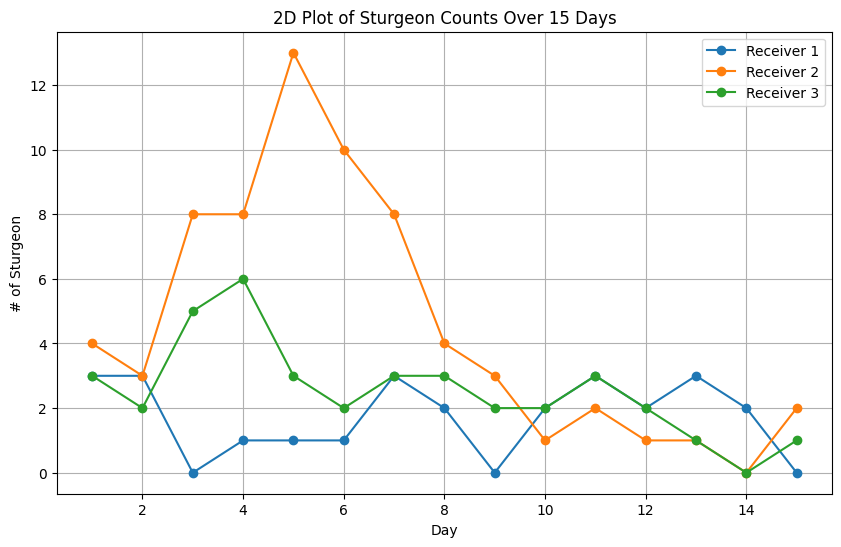

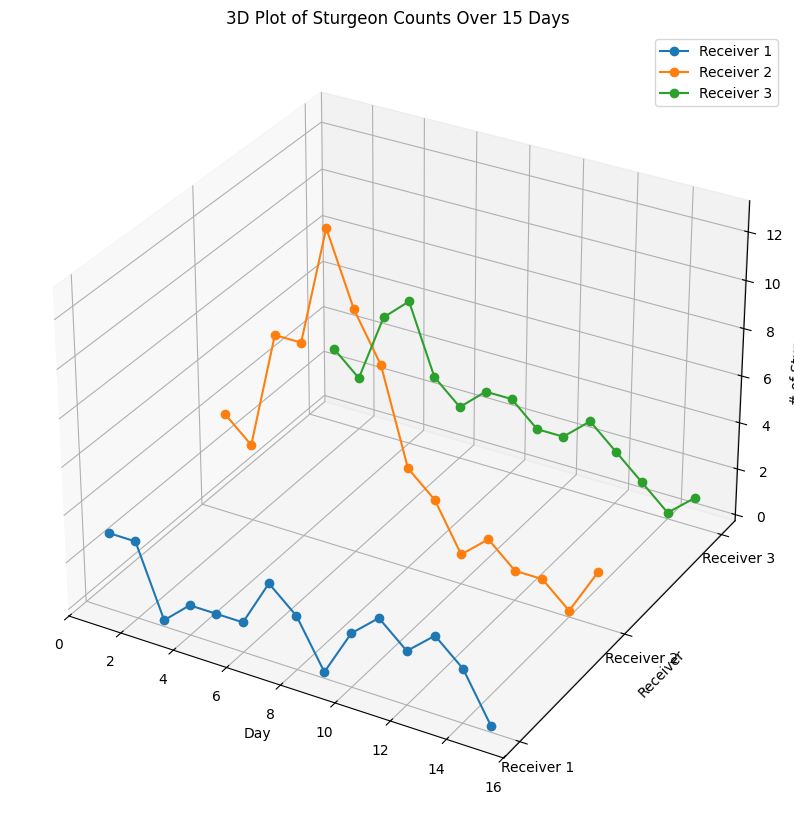

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Function to take user inputs for the number of sturgeon for 3 receivers over 15 days
def get_user_input():
    data = {}
    for receiver in range(1, 4):  # 3 receivers
        sturgeon_counts = []
        for day in range(1, 16):  # 15 days
            count = int(input(f"Enter # of sturgeon for Receiver {receiver} on Day {day}: "))
            sturgeon_counts.append(count)
        data[f"Receiver {receiver}"] = sturgeon_counts
    return data

# Uncomment the following line to use user input instead of sample data
# data = get_user_input()

# Sample data (for demonstration, comment out get_user_input() to use this)
data = {
    "Receiver 1": [3, 3, 0, 1, 1, 1, 3, 2, 0, 2, 3, 2, 3, 2, 0],
    "Receiver 2": [4, 3, 8, 8, 13, 10, 8, 4, 3, 1, 2, 1, 1, 0, 2],
    "Receiver 3": [3, 2, 5, 6, 3, 2, 3, 3, 2, 2, 3, 2, 1, 0, 1],
}

# Create a DataFrame to mimic the structured table
days = list(range(1, 16))
df = pd.DataFrame(data, index=days)
df.index.name = 'Day'

# Print the table in a structured way
print("Structured Table of Sturgeon Counts:")
print(df)

# Plot 2D graph for all receivers
plt.figure(figsize=(10, 6))
for receiver in data.keys():
    plt.plot(days, data[receiver], marker='o', label=receiver)

plt.title("2D Plot of Sturgeon Counts Over 15 Days")
plt.xlabel("Day")
plt.ylabel("# of Sturgeon")
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')

x = np.array(days)  # Days on the X-axis
for i, receiver in enumerate(data.keys()):
    y = np.array([i + 1] * len(days))  # Receiver number on the Y-axis (1, 2, 3)
    z = np.array(data[receiver])  # Sturgeon count on the Z-axis
    ax.plot(x, y, z, marker='o', label=receiver)

ax.set_xlabel('Day')
ax.set_ylabel('Receiver')
ax.set_zlabel('# of Sturgeon')
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(list(data.keys()))

plt.title("3D Plot of Sturgeon Counts Over 15 Days")
ax.legend()
plt.show()
